In [1]:
import time
import random
import bisect
import math
import pandas

In [2]:
a = [1, 2, 3]
b = {1, 2, 3}
c = (1, 2, 3)
print(2 in a, 2 in b, 2 in c)

True True True


In [3]:
def tf(f, y, x):
    t0 = time.time() 
    for i in range(len(x)):
        f(y, x[i])
    t1 = time.time()
    return (t1 - t0) * 1e6 / len(x)

In [4]:
n = 100000
t = 1000
a = list(range(n))
b = set(range(n))
c = tuple(range(n))

print(tf(lambda y, xi: xi in y, a, [1] * t))
print(tf(lambda y, xi: xi in y, b, [1] * t))
print(tf(lambda y, xi: xi in y, c, [1] * t))
print(tf(lambda y, xi: xi in y, a, [n] * t))
print(tf(lambda y, xi: xi in y, b, [n] * t))
print(tf(lambda y, xi: xi in y, c, [n] * t))

0.0
0.0
0.0
814.7764205932617
0.0
967.3342704772949


In [5]:
print(bisect.bisect(a, 5000))
print(tf(lambda y, xi: bisect.bisect(y, xi), a, [1] * t))
print(tf(lambda y, xi: bisect.bisect(y, xi), a, [n] * t))
print(tf(lambda y, xi: bisect.bisect(y, xi), a, [random.randint(0, n) for j in range(t)]))

5001
0.0
0.0
1.5075206756591797


<Axes: >

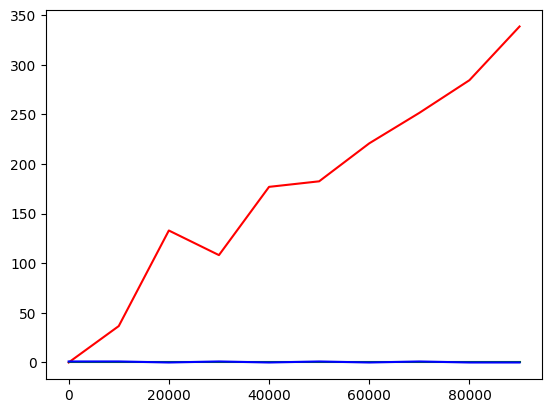

In [10]:
t1 = pandas.Series()
t2 = pandas.Series()
t3 = pandas.Series()
t4 = pandas.Series()
for i in range(1, 100000, 10000):
    xs = [random.randint(0, i) for j in range(1000)]
    t1.loc[i] = tf(lambda y, x: x in y, list(range(i)), xs)
    t2.loc[i] = tf(lambda y, x: x in y, set(range(i)), xs)
    t3.loc[i] = tf(lambda y, x: bisect.bisect(y, x), list(range(i)), xs)
    t4.loc[i] = math.log2(i)
t1.plot.line(color = "red")
t2.plot.line(color = "green")
t3.plot.line(color = "blue")
#t4.plot.line(color = "black")